In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

import tensorflow as tf

from tensorflow.keras import optimizers

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [ ]:
path = '/content/drive/MyDrive/cell_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Training data

train_dir = '/content/cell_images/train'

SIZE = 64
train_images = []
# Store training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
for folder_name in ['/parasitized/', '/uninfected/']:

    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            image = Image.open(train_dir + folder_name + image_name)

            image = image.resize((SIZE, SIZE))

            # Convert images to arrays
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Convert lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Testing data
test_dir = '/content/cell_images/test'

SIZE = 64
test_images = []
# Store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
for folder_name in ['/parasitized/', '/uninfected/']:

    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            image = Image.open(test_dir + folder_name + image_name)

            image = image.resize((SIZE, SIZE))

            # Convert images to arrays
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [ ]:
# Shape of images
print("Train_images shape:", train_images.shape)
print("Test_images shape:", test_images.shape)

# Shape of labels
print("Train_labels shape:", train_labels.shape)
print("Test_labels shape:", test_labels.shape)

Train_images shape: (24958, 64, 64, 3)
Test_images shape: (2600, 64, 64, 3)
Train_labels shape: (24958,)
Test_labels shape: (2600,)


###<b>Normalize the images

In [ ]:
# Normalize by dividing by 255 and convert them to float32

train_images = train_images.astype('float32') / 255

test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 2)

test_labels = tf.keras.utils.to_categorical(test_labels, 2)

train_images minimum: 0, train_images maximum: 255
test_images minimum: 0, test_images maximum: 255


([<matplotlib.patches.Wedge at 0x7f472b586c10>,
 [Text(6.735557395310444e-17, 1.1, 'test_labels_uninfected'),
  Text(-2.0206672185931328e-16, -1.1, 'test_labels_parasitized')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

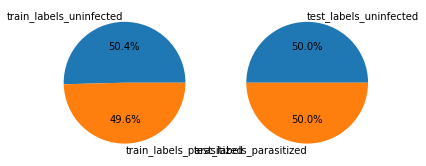

In [ ]:
data_train = [pd.DataFrame(train_labels).value_counts()[0], pd.DataFrame(train_labels).value_counts()[1]]
data_test = [pd.DataFrame(test_labels).value_counts()[0], pd.DataFrame(test_labels).value_counts()[1]]
labels_train = ['train_labels_uninfected', 'train_labels_parasitized']
labels_test = ['test_labels_uninfected', 'test_labels_parasitized']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(data_train, labels = labels_train, autopct='%.1f%%')
ax2.pie(data_test, labels = labels_test, autopct='%.1f%%')

###<B>One Hot Encoding on the train and test labels

In [ ]:
import cv2

gfx_train=[]

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx_train.append(a)

gfx_train = np.array(gfx_train)

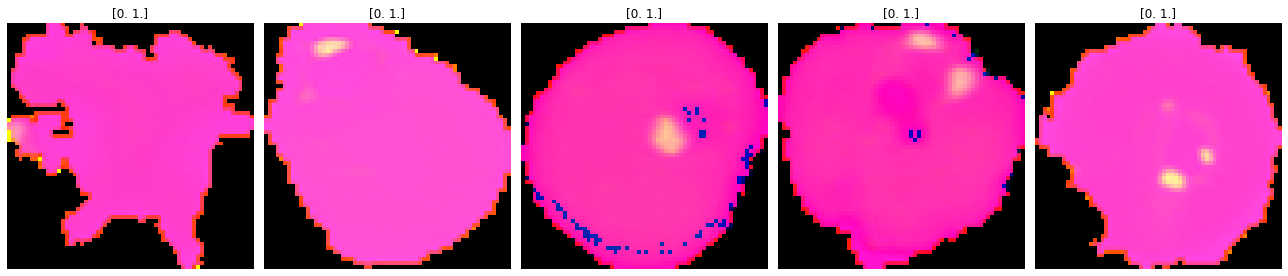

In [ ]:
# View training images
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_train[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
# Apply Gassian Blurring
gbx_train = []

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx_train.append(b)

gbx_train = np.array(gbx_train)

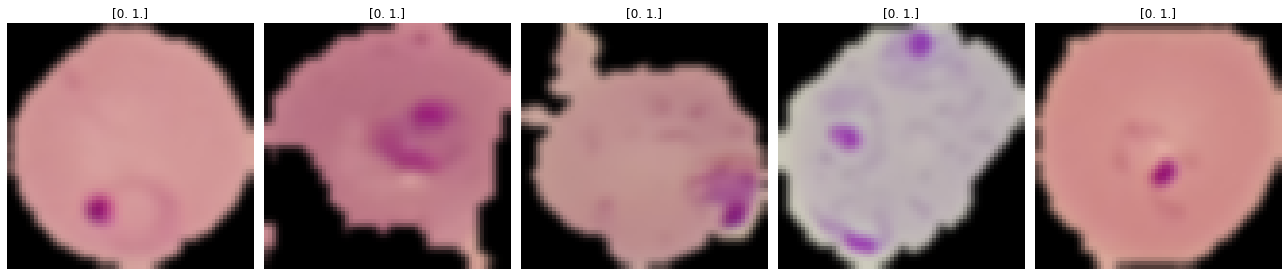

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gbx_train[i])

  ax[t].set_axis_off()

  fig.tight_layout()

### **Model 1**


###<b> Importing the required libraries for building and training our Model

In [ ]:
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

backend.clear_session()

###<b> Building the model

In [ ]:
# 13 layer CNN
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 103s 163ms/step - loss: 0.4240 - accuracy: 0.7947 - val_loss: 0.2410 - val_accuracy: 0.9189
Epoch 2/20
624/624 [==============================] - 100s 160ms/step - loss: 0.1276 - accuracy: 0.9539 - val_loss: 0.1026 - val_accuracy: 0.9868
Epoch 3/20
624/624 [==============================] - 95s 153ms/step - loss: 0.0953 - accuracy: 0.9688 - val_loss: 0.1445 - val_accuracy: 0.9822
Epoch 4/20
624/624 [==============================] - 94s 150ms/step - loss: 0.0799 - accuracy: 0.9731 - val_loss: 0.0666 - val_accuracy: 0.9880
Epoch 5/20
624/624 [==============================] - 98s 157ms/step - loss: 0.0727 - accuracy: 0.9742 - val_loss: 0.0912 - val_accuracy: 0.9810
Epoch 6/20
624/624 [==============================] - 94s 151ms/step - loss: 0.0706 - accuracy: 0.9765 - val_loss: 0.0835 - val_accuracy: 0.9814


###<b> Evaluating the model on test data

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))

# Confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Plot accuracy

accuracy = model.evaluate(test_images, test_labels, verbose = 1)

accuracy

def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

plot_accuracy(history)

###<b> Model 2 (additional layers)



In [ ]:
backend.clear_session()

###<b> Building the Model

In [ ]:
# 16 layer CNN

model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = "relu"))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax"))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 97s 154ms/step - loss: 0.3951 - accuracy: 0.7976 - val_loss: 0.1933 - val_accuracy: 0.9579
Epoch 2/20
624/624 [==============================] - 105s 169ms/step - loss: 0.0983 - accuracy: 0.9668 - val_loss: 0.0700 - val_accuracy: 0.9866
Epoch 3/20
624/624 [==============================] - 109s 175ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.0679 - val_accuracy: 0.9840
Epoch 4/20
624/624 [==============================] - 114s 183ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 5/20
624/624 [==============================] - 94s 150ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.0950 - val_accuracy: 0.9730
Epoch 6/20
624/624 [==============================] - 96s 154ms/step - loss: 0.0692 - accuracy: 0.9751 - val_loss: 0.0729 - val_accuracy: 0.9780


###<b> Evaluating the model

82/82 [==============================] - 3s 35ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



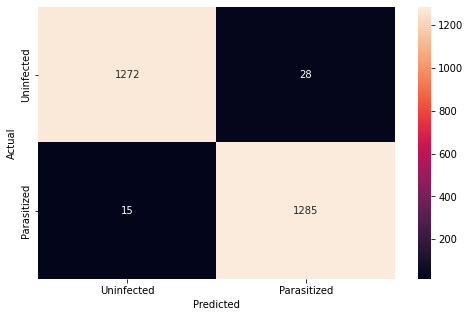

In [ ]:
pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

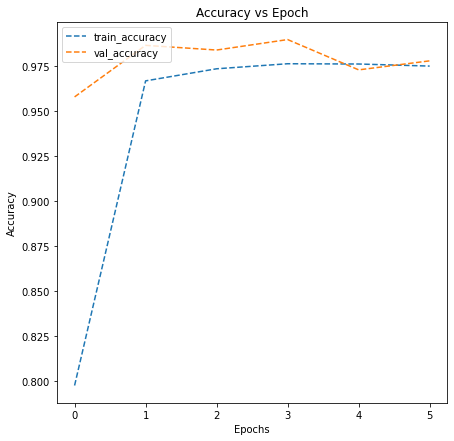

In [ ]:
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

plot_accuracy(history1)

###<b> Model 3 (Batch Normalization with LeakyRelu)

In [ ]:
backend.clear_session() # Clearing the backend for new model

In [ ]:
# 16 layer CNN with LeakyRelu

model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "LeakyReLU"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax"))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
history3 = model3.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 112s 178ms/step - loss: 0.3127 - accuracy: 0.8572 - val_loss: 0.0720 - val_accuracy: 0.9852
Epoch 2/20
624/624 [==============================] - 112s 179ms/step - loss: 0.1013 - accuracy: 0.9674 - val_loss: 0.0446 - val_accuracy: 0.9908
Epoch 3/20
624/624 [==============================] - 113s 181ms/step - loss: 0.0869 - accuracy: 0.9719 - val_loss: 0.0699 - val_accuracy: 0.9856
Epoch 4/20
624/624 [==============================] - 108s 173ms/step - loss: 0.0797 - accuracy: 0.9744 - val_loss: 0.0542 - val_accuracy: 0.9880


82/82 [==============================] - 4s 45ms/step - loss: 0.0690 - accuracy: 0.9808

 Test_Accuracy:- 0.9807692170143127
82/82 [==============================] - 4s 48ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



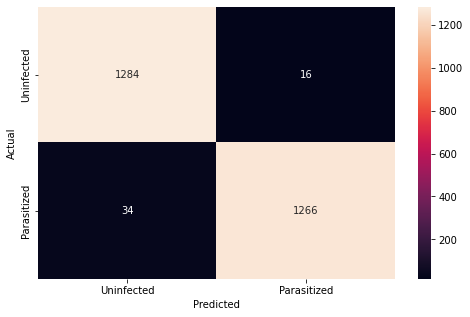

In [ ]:
accuracy = model1_2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

pred = model1_2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

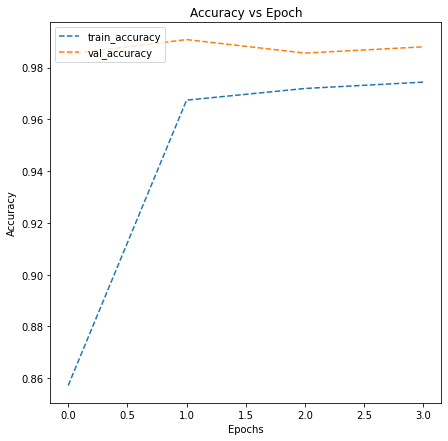

In [ ]:
plot_accuracy(history1_2)

####<b>Observations and insights: The model generated by performing a batch normalization and using LeakyRelu as an activation function (model 3) exhibits a good performance on making predictions, with an accuracy of above 95%. However, comparing to the previous models, even though the accuracies on the validation data from both models are similar, model 1 shows a higher accuracy on the training data. More importantly, in model 1, the prediction accuracy on both training and validation data converges after 5 epochs, while there are still obvious residuals in model 2.

###<b>Model 4  (Input Image Augmented)

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to modify images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

train_generator = train_datagen.flow(x = train_images, y = train_labels, batch_size = 64, seed = 42, shuffle = True)

val_generator =  val_datagen.flow(x = test_images, y = test_labels, batch_size = 64, seed = 42, shuffle = True)

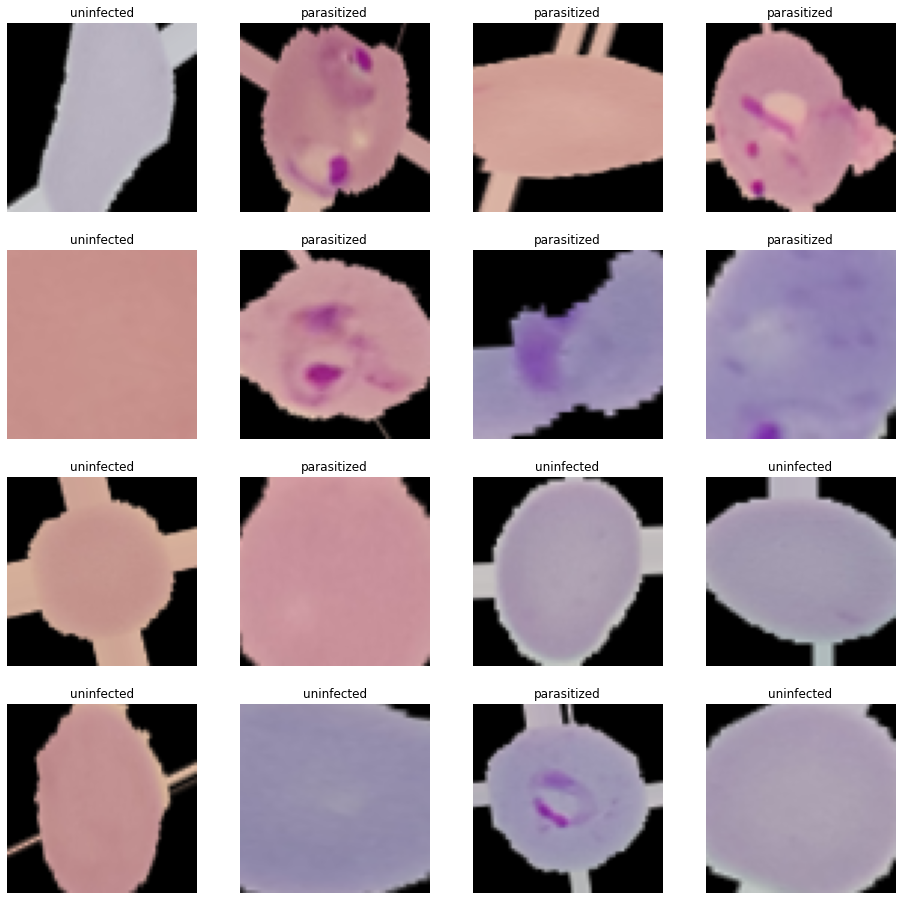

In [ ]:
images, labels = next(train_generator)

# Plotting images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: Here data augmentation is performed using ImageDataGenerator, which zoom in and rotates the original images to increase accuracy of recognizing the correct features and thus help with classifications.
Looking at the augmented images, it appears that this approach is valid since the purple stains are still visible in images of infected cells and no confounding elements have been introduced.

###<b>Building the Model

In [ ]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same', activation = 'LeakyReLU'))

model4.add(MaxPooling2D(pool_size = 2))

model4.add(Dropout(0.2))

model4.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model4.add(MaxPooling2D(pool_size = 2))

model4.add(Dropout(0.2))

model4.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "LeakyReLU"))

model4.add(MaxPooling2D(pool_size = 2))

model4.add(Dropout(0.2))

model4.add(Flatten())

model4.add(Dense(512, activation = "LeakyReLU"))

model4.add(Dropout(0.4))

model4.add(tf.keras.layers.BatchNormalization())

model4.add(Dense(2, activation = "softmax"))

adam = optimizers.Adam(learning_rate = 0.001)

model4.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history4 = model4.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
390/390 [==============================] - 166s 424ms/step - loss: 0.2976 - accuracy: 0.8928 - val_loss: 0.3827 - val_accuracy: 0.9058
Epoch 2/20
390/390 [==============================] - 162s 415ms/step - loss: 0.2342 - accuracy: 0.9177 - val_loss: 0.3065 - val_accuracy: 0.9304
Epoch 3/20
390/390 [==============================] - 160s 409ms/step - loss: 0.2071 - accuracy: 0.9271 - val_loss: 0.3448 - val_accuracy: 0.9200
Epoch 4/20
390/390 [==============================] - 159s 409ms/step - loss: 0.1929 - accuracy: 0.9330 - val_loss: 0.3950 - val_accuracy: 0.9227


###<B>Evaluating the model

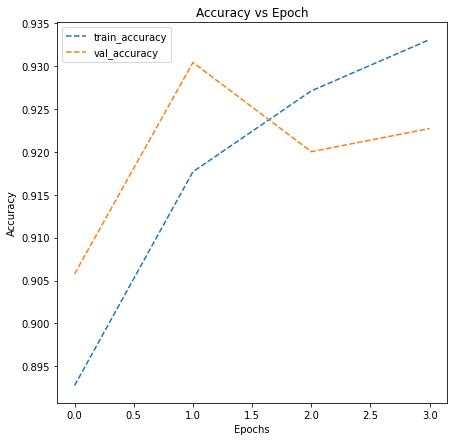

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 50ms/step - loss: 0.3950 - accuracy: 0.9227

 Test_Accuracy:- 0.9226922988891602


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 4s 49ms/step
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1300
           1       0.98      0.86      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



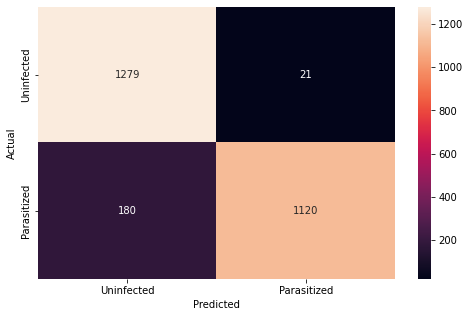

In [ ]:
pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = tf.keras.layers.BatchNormalization()(x)

x = Dense(64, activation = 'relu')(x)

x = Dropout(0.3)(x)

pred = Dense(2, activation = 'softmax')(x)

model5 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model
model5.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history5 = model5.fit(
            train_images, train_labels,
            epochs = 10,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1037s 2s/step - loss: 0.2361 - accuracy: 0.9023 - val_loss: 0.2362 - val_accuracy: 0.9377
Epoch 2/10
624/624 [==============================] - 977s 2s/step - loss: 0.1876 - accuracy: 0.9264 - val_loss: 0.2673 - val_accuracy: 0.9195
Epoch 3/10
624/624 [==============================] - 976s 2s/step - loss: 0.1758 - accuracy: 0.9305 - val_loss: 0.1138 - val_accuracy: 0.9790
Epoch 4/10
624/624 [==============================] - 967s 2s/step - loss: 0.1647 - accuracy: 0.9369 - val_loss: 0.0917 - val_accuracy: 0.9810
Epoch 5/10
624/624 [==============================] - 970s 2s/step - loss: 0.1546 - accuracy: 0.9399 - val_loss: 0.1109 - val_accuracy: 0.9706
Epoch 6/10
624/624 [==============================] - 972s 2s/step - loss: 0.1601 - accuracy: 0.9410 - val_loss: 0.4051 - val_accuracy: 0.8359
Epoch 7/10
624/624 [==============================] - 971s 2s/step - loss: 0.1519 - accuracy: 0.9405 - val_loss: 0.1510 - val_accuracy: 0.956

<b>Plot the train and validation accuracy

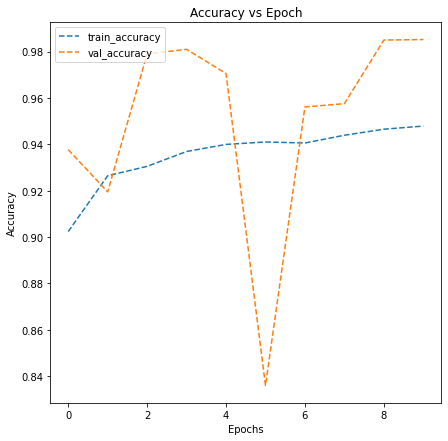

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data

accuracy = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 114s 1s/step - loss: 0.1353 - accuracy: 0.9546

 Test_Accuracy:- 0.9546154141426086


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 122s 1s/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1300
           1       0.98      0.93      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.96      0.95      0.95      2600
weighted avg       0.96      0.95      0.95      2600



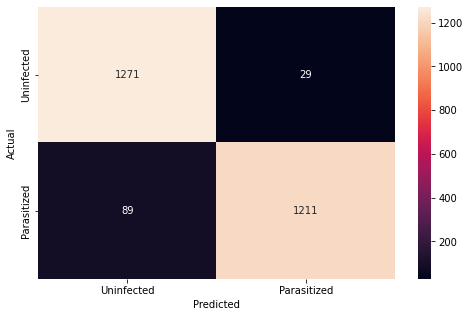

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()